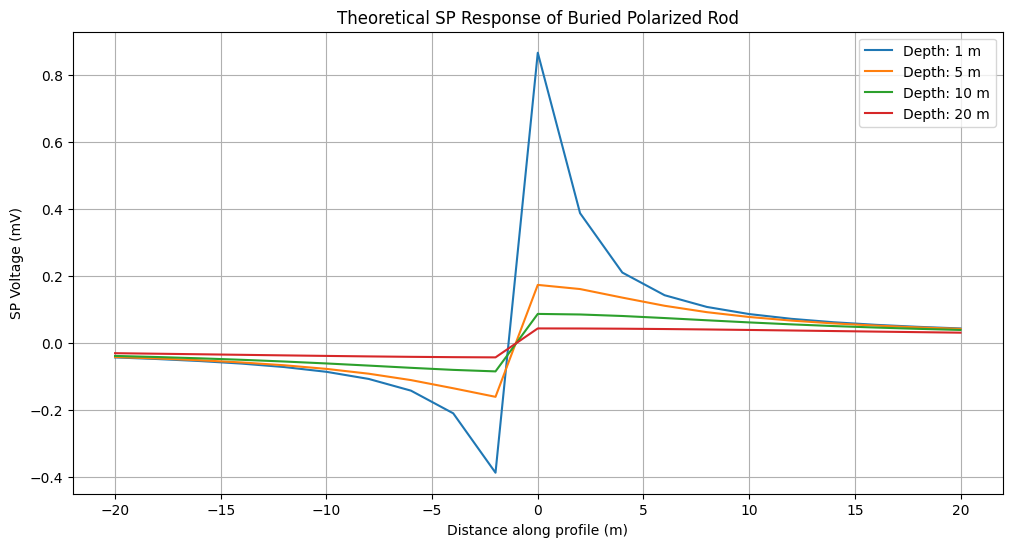

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Profile parameters
station_spacing = 2  # in meters
profile_length = 40  # in meters
rod_length = 40  # in meters
dip_angle = 30  # angle in degrees

# Depth of burial values
depths = [1, 5, 10, 20]  # in meters

# Calculate SP response for each depth
stations = np.arange(-profile_length/2, profile_length/2 + station_spacing, station_spacing)
sp_responses_positive = []  # for positive value
sp_responses_negative = []  # for negative value

for depth in depths:
    sp_response_positive = []
    sp_response_negative = []

    for station in stations:
        # Calculate distance r using Pythagoras theorem
        r = np.sqrt(depth**2 + station**2)
        apparent_resistivity = np.cos(np.radians(dip_angle)) / r

        if station >= 0:
            sp_response_positive.append(apparent_resistivity)
            sp_response_negative.append(0)
        else:
            sp_response_positive.append(0)
            sp_response_negative.append(-apparent_resistivity)

    sp_responses_positive.append(sp_response_positive)
    sp_responses_negative.append(sp_response_negative)

# Combine positive and negative SP responses
combined_responses = [
    [pos + neg for pos, neg in zip(pos_response, neg_response)]
    for pos_response, neg_response in zip(sp_responses_positive, sp_responses_negative)
]

# Plotting
plt.figure(figsize=(12, 6))
for i, depth in enumerate(depths):
    plt.plot(stations, combined_responses[i], label=f'Depth: {depth} m')

plt.xlabel('Distance along profile (m)')
plt.ylabel('SP Voltage (mV)')
plt.title('Theoretical SP Response of Buried Polarized Rod')
plt.grid()
plt.legend()
plt.show()
